## Import Modules

In [269]:
import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [270]:
os.getcwd()

'C:\\Users\\sures\\Documents\\Python Training'

## Import dataset

In [271]:
train = pd.read_csv(r'C:\Users\sures\Downloads\AV Cross validation\train.csv')
test = pd.read_csv(r'C:\Users\sures\Downloads\AV Cross validation\test.csv')

In [272]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [273]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


## Combine Test and train

In [274]:
train['Source'] = 'train'
test['Source'] = 'test'
data = pd.concat([train, test], ignore_index = True )

In [275]:
data.shape

(508146, 13)

In [276]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,508146.0,NaN,NaN,NaN,254073.5,146689.259281,1.0,127037.25,254073.5,381109.75,508146.0
Gender,508146,2,Male,274325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,508146.0,NaN,NaN,NaN,38.808413,15.500179,20.0,25.0,36.0,49.0,85.0
Driving_License,508146.0,NaN,NaN,NaN,0.997936,0.045388,0.0,1.0,1.0,1.0,1.0
Region_Code,508146.0,NaN,NaN,NaN,26.406572,13.224921,0.0,15.0,28.0,35.0,52.0
Previously_Insured,508146.0,NaN,NaN,NaN,0.458667,0.498289,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,508146,3,1-2 Year,267015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,508146,2,Yes,256248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,508146.0,NaN,NaN,NaN,30554.453041,17146.574625,2630.0,24381.0,31661.0,39403.75,540165.0
Policy_Sales_Channel,508146.0,NaN,NaN,NaN,111.975838,54.246027,1.0,26.0,133.0,152.0,163.0


## Finding Missing Values and data types

In [277]:
data.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
Source                       0
dtype: int64

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
 12  Source                508146 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 50.4+ MB


In [279]:
data.nunique()

id                      508146
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           52062
Policy_Sales_Channel       157
Vintage                    290
Response                     2
Source                       2
dtype: int64

## Identifying Numerical and categorical columns

In [280]:
num_features=[]

for i in data.columns:
    if (data[i].dtype!='object'):
        num_features.append(i)
        
        
cat_features=[]

for i in data.columns:
    if (data[i].dtype=='object'):
        cat_features.append(i)

In [281]:
num_features, cat_features

(['id',
  'Age',
  'Driving_License',
  'Region_Code',
  'Previously_Insured',
  'Annual_Premium',
  'Policy_Sales_Channel',
  'Vintage',
  'Response'],
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Source'])

## Visualization and EDA

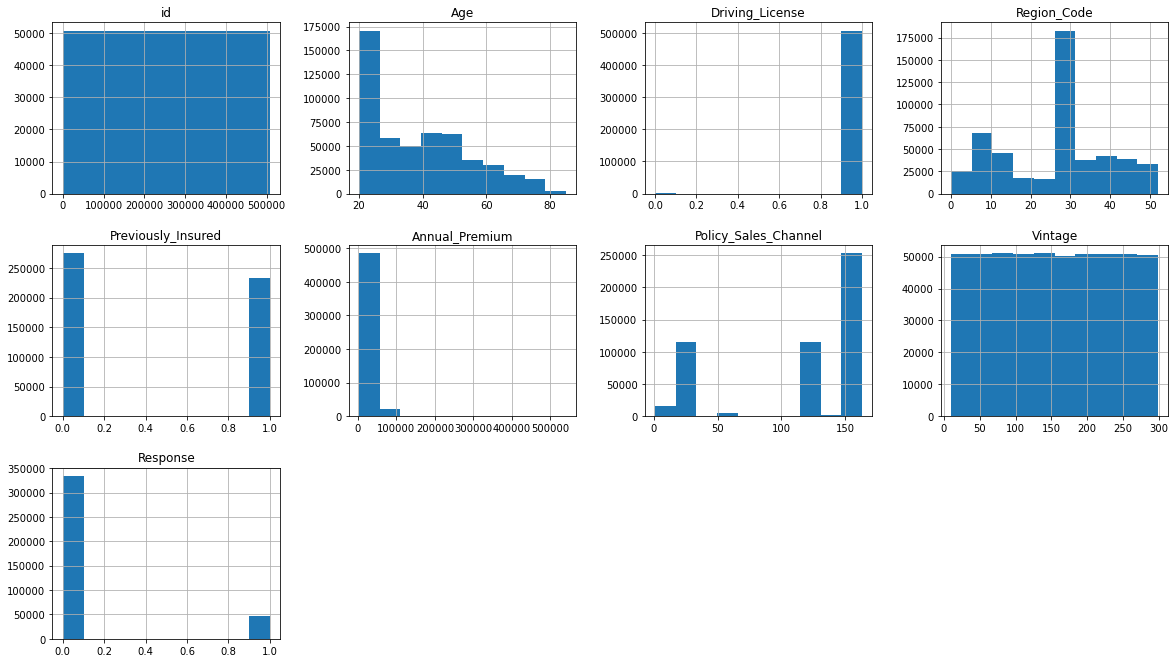

In [282]:
data.hist(figsize=(20,40),layout=(10,4))
plt.savefig('Crossprediction.png')
#plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

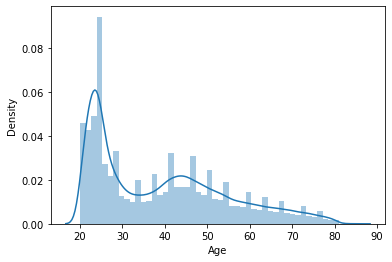

In [283]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

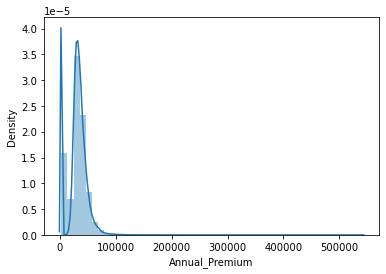

In [284]:
sns.distplot(data['Annual_Premium'])

<AxesSubplot:xlabel='Gender'>

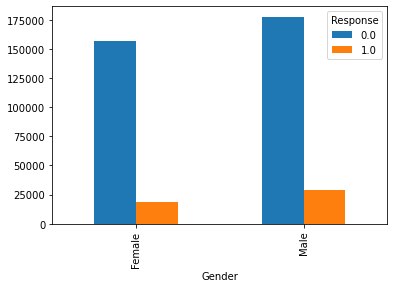

In [285]:
data.groupby('Gender')['Response'].value_counts().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Vehicle_Age'>

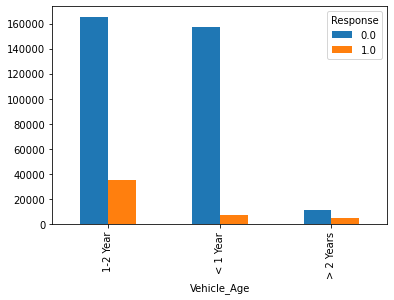

In [286]:
data.groupby('Vehicle_Age')['Response'].value_counts().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Vehicle_Damage'>

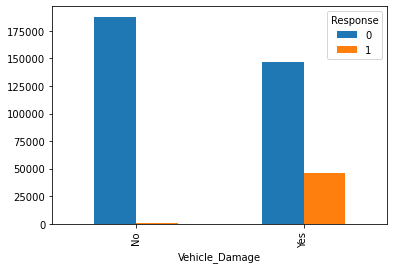

In [287]:
train.groupby('Vehicle_Damage')['Response'].value_counts().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Previously_Insured'>

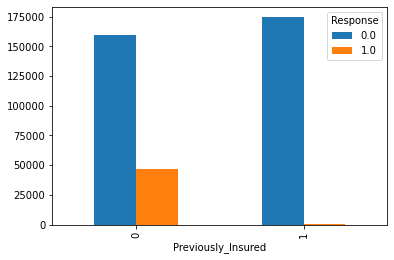

In [288]:
data.groupby('Previously_Insured')['Response'].value_counts().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Vehicle_Age'>

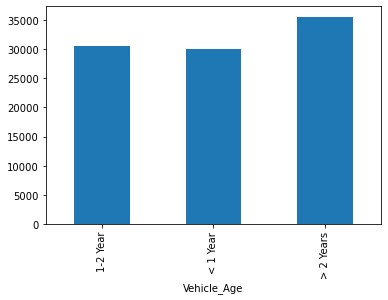

In [289]:
data.groupby('Vehicle_Age')['Annual_Premium'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Vehicle_Damage'>

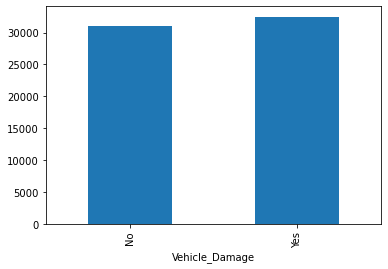

In [290]:
data.groupby('Vehicle_Damage')['Annual_Premium'].median().plot(kind = 'bar')

<AxesSubplot:xlabel='Previously_Insured'>

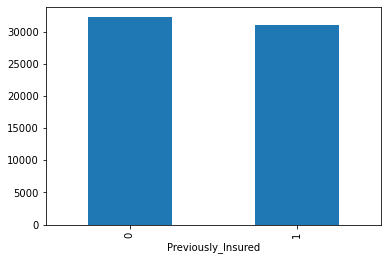

In [291]:
data.groupby('Previously_Insured')['Annual_Premium'].median().plot(kind = 'bar')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Annual_Premium'>

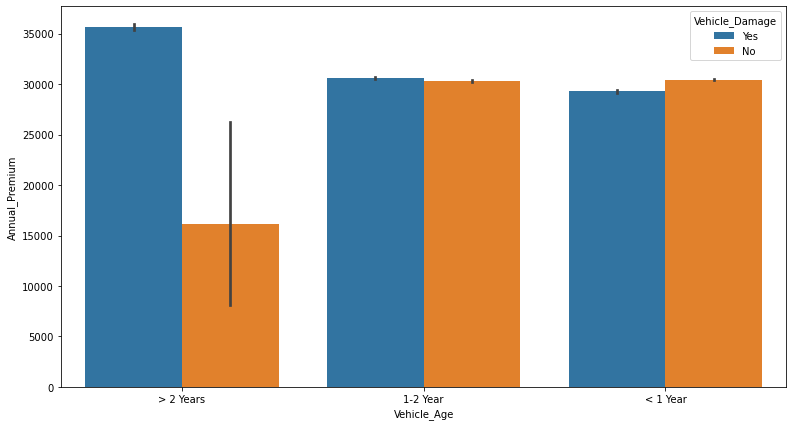

In [292]:
plt.figure(figsize=(13, 7))
sns.barplot(x="Vehicle_Age", y = "Annual_Premium", hue = 'Vehicle_Damage',data = data)


<AxesSubplot:xlabel='Vehicle_Age', ylabel='Annual_Premium'>

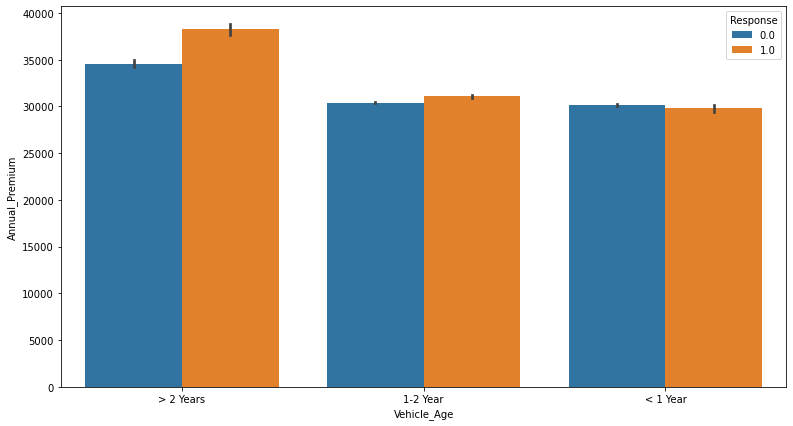

In [293]:
plt.figure(figsize=(13, 7))
sns.barplot(x="Vehicle_Age", y = "Annual_Premium", hue = 'Response',data = data)

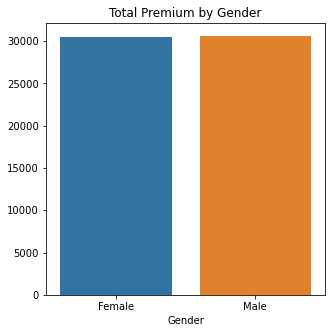

In [294]:
plt.figure(figsize=(5, 5))
AP_Gender = data.groupby(by='Gender').mean()['Annual_Premium']
sns.barplot(x=AP_Gender.index,y=AP_Gender.values)
plt.title('Total Premium by Gender')
plt.show()

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

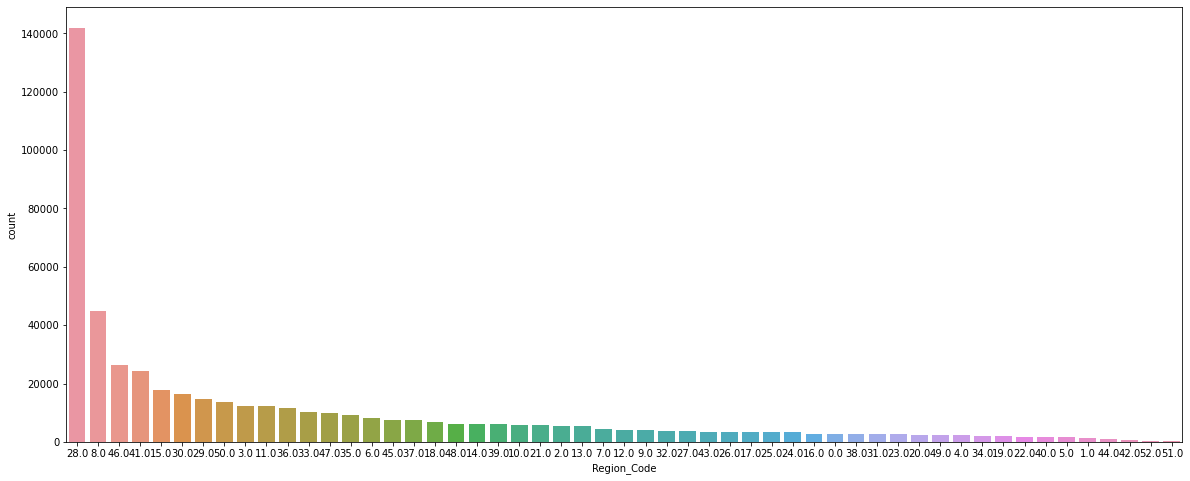

In [295]:
plt.figure(figsize=(20, 8))
sns.countplot(x= 'Region_Code',data = data, order = data['Region_Code'].value_counts().index)

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='count'>

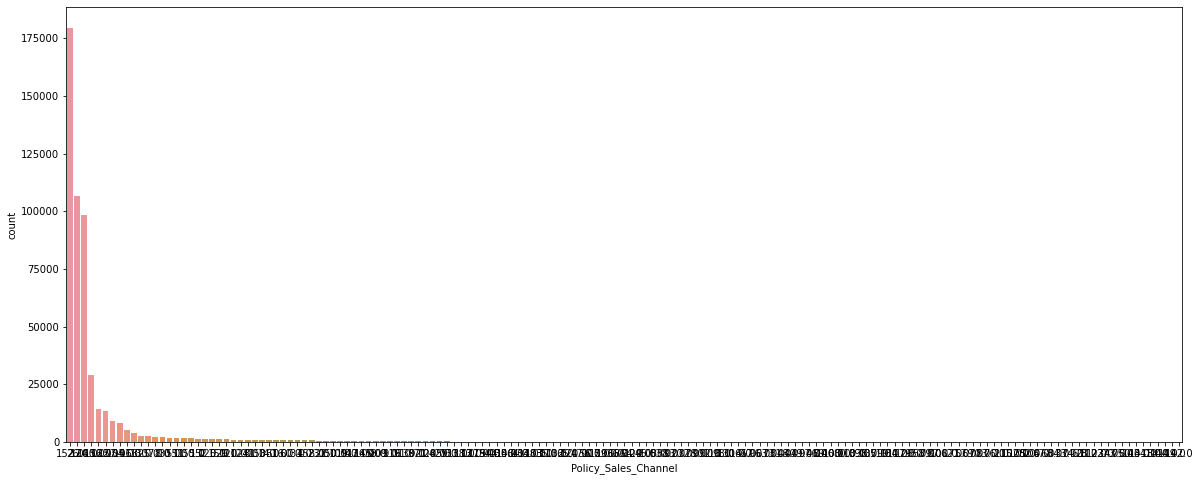

In [296]:
plt.figure(figsize=(20, 8))
sns.countplot(x= 'Policy_Sales_Channel',data = data, order = data['Policy_Sales_Channel'].value_counts().index)

<AxesSubplot:xlabel='Vintage', ylabel='Response'>

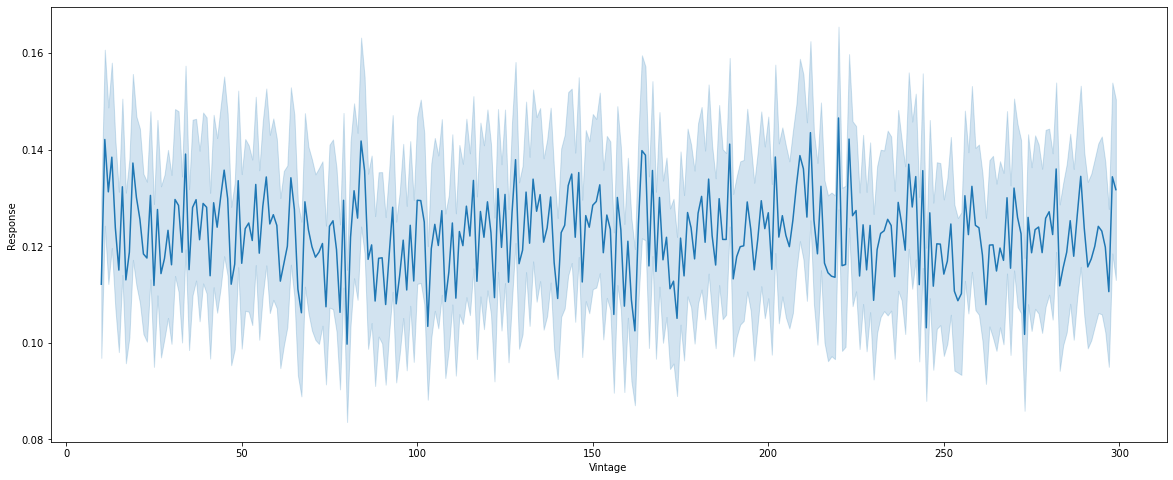

In [297]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='Vintage', y='Response', data = data)

## First look insights from EDA

Story
1. Damaged Vehicle with 1-2 years old and who are insured already are more likely to buy insurance again
2. Generally people do not prefer purchasing high premium
3. People who own vehicle > 2 years with damage pays for high annual premium
4. Male population opts for slightly high annual premium
5. Region code 28 gets the more customers
6. Only few policy channels get more customers

Others:
1. Age and Annual premium are skewed
2. Driving licence doesnt add any value, can be dropped
3. Gender, Vehicle age, damage, previously insured to be encoded
4. Age, Vintage and Annual Premiumn can be binned

## Data Cleaning

In [298]:
gender_map={'Male':0,'Female':1}

data['Gender']=data['Gender'].map(gender_map)


vehicle_age_map={'1-2 Year':0,'< 1 Year':1,'> 2 Years':2}

data['Vehicle_Age']=data['Vehicle_Age'].map(vehicle_age_map)


Vehicle_Damage_map={'Yes':0,'No':1}

data['Vehicle_Damage']=data['Vehicle_Damage'].map(Vehicle_Damage_map)

## Understanding correlation between all the numerical features

<AxesSubplot:>

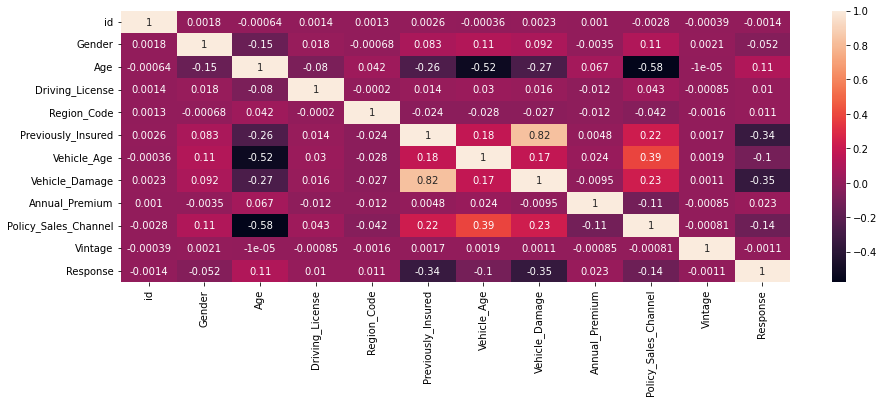

In [299]:
plt.figure(figsize=(15, 5))
sns.heatmap(data.corr(),annot=True)

In [300]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
0,1,0,44,1,28.0,0,2,0,40454.0,26.0,217,1.0,train
1,2,0,76,1,3.0,0,0,1,33536.0,26.0,183,0.0,train
2,3,0,47,1,28.0,0,2,0,38294.0,26.0,27,1.0,train
3,4,0,21,1,11.0,1,1,1,28619.0,152.0,203,0.0,train
4,5,1,29,1,41.0,1,1,1,27496.0,152.0,39,0.0,train


## Feature Engineering

### 1. Binning features

selected features to be binned using Decision Tree method with only the train data to understand how the prediction with binning is accurate

In [301]:
X=data.loc[data['Source']=='train',['Age','Annual_Premium','Vintage','Response']]
y=data.loc[data['Source']=='train',['Response']]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 2)

In [302]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

def get_tree_depth(i):
    score_ls = []     # here I will store the roc auc
    score_std_ls = [] # here I will store the standard deviation of the roc_auc
    for tree_depth in [1,2,3,4]:
        tree_model = DecisionTreeClassifier(max_depth=tree_depth)
        scores = cross_val_score(tree_model,i.to_frame(),y_train, cv=3, scoring='roc_auc')   
        score_ls.append(np.mean(scores))
        score_std_ls.append(np.std(scores))
    temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
    temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
    print(temp)

#### 1) Age

##### a) Apply the get tree depth function to find the right depth

In [303]:
get_tree_depth(x_train['Age'])

   depth  roc_auc_mean  roc_auc_std
0      1      0.653528     0.002830
1      2      0.683938     0.002064
2      3      0.689069     0.002108
3      4      0.695761     0.002520


##### b) Fit the model to find the different bins created

<AxesSubplot:xlabel='Age_bin'>

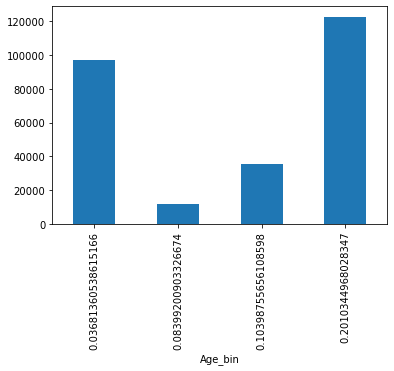

In [304]:
### Fit the Decision Tree
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.Age.to_frame(),y_train)
## Calculate the probability
x_train['Age_bin']=dtree.predict_proba(x_train.Age.to_frame())[:,1]
x_train.groupby('Age_bin')['Response'].count().plot.bar()

##### c) Check the relationship of the bin with the target value

<AxesSubplot:xlabel='Age_bin'>

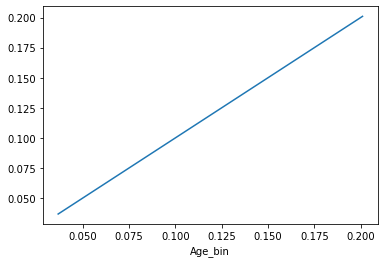

In [305]:
x_train.groupby('Age_bin')['Response'].mean().plot()

##### d) Define the minimum and max value for each bins created

In [306]:
age_limit=pd.DataFrame({'Min_Age':x_train.groupby('Age_bin')['Age'].min(),'Max_Age':x_train.groupby('Age_bin')['Age'].max()})
age_limit

,Min_Age,Max_Age
Age_bin,,
0.036814,20,27
0.083992,28,29
0.103988,59,85
0.201034,30,58


##### e) Create a new label to describe the bin category and assign numerical values to the actual binned feature

In [307]:
data.loc[(data['Age']>=20) & (data['Age']<27),'Age_label']='New Drivers' ## Just starting out
data.loc[(data['Age']>=27) & (data['Age']<29),'Age_label']='Young' ## Young Ppl
data.loc[(data['Age']>=29) & (data['Age']<58),'Age_label']='Middle Age' ## Mid-Age Ppl
data.loc[(data['Age']>=58) & (data['Age']<=85),'Age_label']='Old Age' ## Old Age

data.loc[(data['Age']>=20) & (data['Age']<27),'Age']=0 ## Just starting out
data.loc[(data['Age']>=27) & (data['Age']<29),'Age']=1 ## Young Ppl
data.loc[(data['Age']>=29) & (data['Age']<58),'Age']=2 ## Mid-Age Ppl
data.loc[(data['Age']>=58) & (data['Age']<=85),'Age']=3 ## Old Age

#### 2) Vintage Binning (Repeat steps a-e as above)

In [308]:
get_tree_depth(x_train['Vintage'])

   depth  roc_auc_mean  roc_auc_std
0      1      0.499771     0.000242
1      2      0.500872     0.000638
2      3      0.499462     0.002159
3      4      0.502176     0.000958


<AxesSubplot:xlabel='Vintage_bin'>

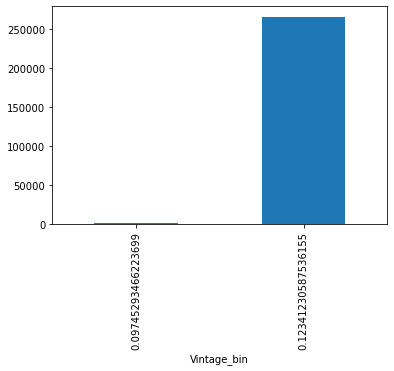

In [309]:
### Fit the Decision Tree
dtree=DecisionTreeClassifier(max_depth=1)
dtree.fit(x_train.Vintage.to_frame(),y_train)
## Calculate the probability
x_train['Vintage_bin']=dtree.predict_proba(x_train.Vintage.to_frame())[:,1]
x_train.groupby('Vintage_bin')['Response'].count().plot.bar()

<AxesSubplot:xlabel='Vintage_bin'>

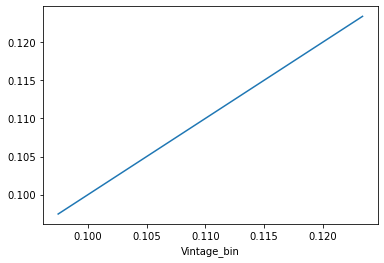

In [310]:
x_train.groupby('Vintage_bin')['Response'].mean().plot()

In [311]:
Vintage_limit=pd.DataFrame({'Min_V':x_train.groupby('Vintage_bin')['Vintage'].min(),'Max_V':x_train.groupby('Vintage_bin')['Vintage'].max()})
Vintage_limit

,Min_V,Max_V
Vintage_bin,,
0.097453,10,10
0.123412,11,299


In [312]:
data.loc[(data['Vintage']<=10) ,'Vintage_label']='New Customers' ## Just starting out
data.loc[(data['Vintage']>10) ,'Vintage_label']='Old Customers' ## Young Ppl


data.loc[(data['Vintage']<=10),'Vintage']=0 ## Just starting out
data.loc[(data['Vintage']>10) ,'Vintage']=1 ## Young Ppl

In [313]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source,Age_label,Vintage_label
0,1,0,2,1,28.0,0,2,0,40454.0,26.0,1,1.0,train,Middle Age,Old Customers
1,2,0,3,1,3.0,0,0,1,33536.0,26.0,1,0.0,train,Old Age,Old Customers
2,3,0,2,1,28.0,0,2,0,38294.0,26.0,1,1.0,train,Middle Age,Old Customers
3,4,0,0,1,11.0,1,1,1,28619.0,152.0,1,0.0,train,New Drivers,Old Customers
4,5,1,2,1,41.0,1,1,1,27496.0,152.0,1,0.0,train,Middle Age,Old Customers


#### 3) Annual Premium Binning

In [314]:
get_tree_depth(x_train['Annual_Premium'])

   depth  roc_auc_mean  roc_auc_std
0      1      0.529599     0.000910
1      2      0.540527     0.000477
2      3      0.547035     0.001000
3      4      0.547878     0.001473


<AxesSubplot:xlabel='Annual_Premium_bin'>

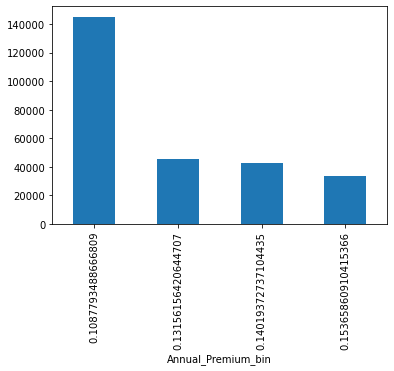

In [315]:
### Fit the Decision Tree
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.Annual_Premium.to_frame(),y_train)
## Calculate the probability
x_train['Annual_Premium_bin']=dtree.predict_proba(x_train.Annual_Premium.to_frame())[:,1]
x_train.groupby('Annual_Premium_bin')['Response'].count().plot.bar()

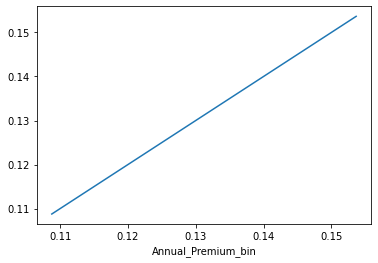

In [316]:
x_train.groupby('Annual_Premium_bin')['Response'].mean().plot()
plt.show()

In [317]:
Annual_Premium_limit=pd.DataFrame({'Min_Premium':x_train.groupby('Annual_Premium_bin')['Annual_Premium'].min(),'Max_Premium':x_train.groupby('Annual_Premium_bin')['Annual_Premium'].max()})
Annual_Premium_limit

,Min_Premium,Max_Premium
Annual_Premium_bin,,
0.108779,10004.0,38085.0
0.131562,2630.0,9816.0
0.140194,38086.0,46170.0
0.153659,46171.0,540165.0


In [318]:

data.loc[(data['Annual_Premium']>=2630.0) & (data['Annual_Premium']<9816.0),'Annual_Premium_label']='Low_premium'
data.loc[(data['Annual_Premium']>=9816.0) & (data['Annual_Premium']<38085.0),'Annual_Premium_label']='Average_premium'
data.loc[(data['Annual_Premium']>=38085.0) & (data['Annual_Premium']<46170.0),'Annual_Premium_label']='Above_avg_premium'
data.loc[(data['Annual_Premium']>=46170.0) & (data['Annual_Premium']<=540165.0),'Annual_Premium_label']='High_premium'


data.loc[(data['Annual_Premium']>=2630.0) & (data['Annual_Premium']<9816.0),'Annual_Premium']=0
data.loc[(data['Annual_Premium']>=9816.0) & (data['Annual_Premium']<38085.0),'Annual_Premium']=1
data.loc[(data['Annual_Premium']>=38085.0) & (data['Annual_Premium']<46170.0),'Annual_Premium']=2
data.loc[(data['Annual_Premium']>=46170.0) & (data['Annual_Premium']<=540165.0),'Annual_Premium']=3

In [319]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source,Age_label,Vintage_label,Annual_Premium_label
0,1,0,2,1,28.0,0,2,0,2.0,26.0,1,1.0,train,Middle Age,Old Customers,Above_avg_premium
1,2,0,3,1,3.0,0,0,1,1.0,26.0,1,0.0,train,Old Age,Old Customers,Average_premium
2,3,0,2,1,28.0,0,2,0,2.0,26.0,1,1.0,train,Middle Age,Old Customers,Above_avg_premium
3,4,0,0,1,11.0,1,1,1,1.0,152.0,1,0.0,train,New Drivers,Old Customers,Average_premium
4,5,1,2,1,41.0,1,1,1,1.0,152.0,1,0.0,train,Middle Age,Old Customers,Average_premium


In [328]:
data['Vintage'].value_counts()

1    506372
0      1774
Name: Vintage, dtype: int64

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  int64  
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  int64  
 7   Vehicle_Damage        508146 non-null  int64  
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
 12  Source                508146 non-null  object 
 13  Age_label             508146 non-null  object 
 14  Vintage_label         508146 non-null  object 
 15  

<AxesSubplot:xlabel='Annual_Premium_label'>

<Figure size 936x504 with 0 Axes>

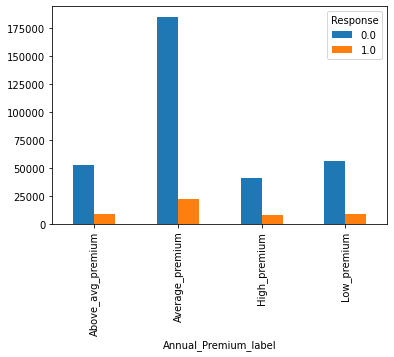

In [322]:
plt.figure(figsize=(13, 7))
data.groupby('Annual_Premium_label')['Response'].value_counts().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Vintage_label'>

<Figure size 936x504 with 0 Axes>

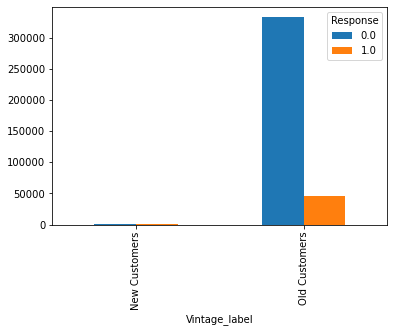

In [323]:
plt.figure(figsize=(13, 7))
data.groupby('Vintage_label')['Response'].value_counts().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Age_label'>

<Figure size 936x504 with 0 Axes>

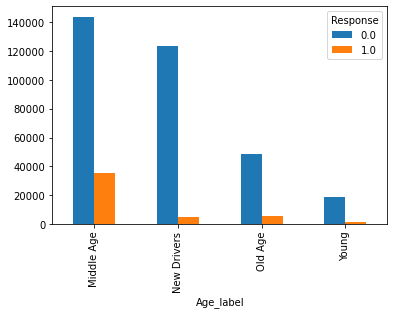

In [324]:
plt.figure(figsize=(13, 7))
data.groupby('Age_label')['Response'].value_counts().unstack().plot(kind = 'bar')

### Feature Encoding

In [331]:
data= pd.get_dummies(data,columns=['Vehicle_Damage','Vehicle_Age','Age','Gender','Previously_Insured','Vintage','Annual_Premium'])

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Driving_License       508146 non-null  int64  
 2   Region_Code           508146 non-null  float64
 3   Policy_Sales_Channel  508146 non-null  float64
 4   Response              381109 non-null  float64
 5   Source                508146 non-null  object 
 6   Age_label             508146 non-null  object 
 7   Vintage_label         508146 non-null  object 
 8   Annual_Premium_label  508146 non-null  object 
 9   Vehicle_Damage_0      508146 non-null  uint8  
 10  Vehicle_Damage_1      508146 non-null  uint8  
 11  Vehicle_Age_0         508146 non-null  uint8  
 12  Vehicle_Age_1         508146 non-null  uint8  
 13  Vehicle_Age_2         508146 non-null  uint8  
 14  Age_0                 508146 non-null  uint8  
 15  

In [334]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,508146.0,254073.500000,146689.259281,1.0,127037.25,254073.5,381109.75,508146.0
Driving_License,508146.0,0.997936,0.045388,0.0,1.00,1.0,1.00,1.0
Region_Code,508146.0,26.406572,13.224921,0.0,15.00,28.0,35.00,52.0
Policy_Sales_Channel,508146.0,111.975838,54.246027,1.0,26.00,133.0,152.00,163.0
Response,381109.0,0.122563,0.327936,0.0,0.00,0.0,0.00,1.0
Vehicle_Damage_0,508146.0,0.504280,0.499982,0.0,0.00,1.0,1.00,1.0
Vehicle_Damage_1,508146.0,0.495720,0.499982,0.0,0.00,0.0,1.00,1.0
Vehicle_Age_0,508146.0,0.525469,0.499351,0.0,0.00,1.0,1.00,1.0
Vehicle_Age_1,508146.0,0.432563,0.495432,0.0,0.00,0.0,1.00,1.0
Vehicle_Age_2,508146.0,0.041968,0.200517,0.0,0.00,0.0,0.00,1.0


## Model Building

In [352]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

In [353]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error


In [354]:
from sklearn.model_selection import GridSearchCV 

In [355]:
train=data.loc[data['Source']=='train']
test=data.loc[data['Source']=='test']

train.drop(['Source','id','Age_label','Annual_Premium_label','Vintage_label'],axis=1,inplace=True)
test.drop(['Source','id','Response','Age_label','Annual_Premium_label','Vintage_label'],axis=1,inplace=True)

In [356]:
X=train.drop(['Response'],axis=1)
y=train['Response'].astype('int')

# test.drop(['Response'],axis=1,inplace=True) ## For Final Prediction

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 5)

In [357]:
def get_classifier_predictions(classifier, X_train, y_train, X_test): 
    classifier.fit(X_train,y_train)
    y_pred_train =classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    y_pred_prob_train = classifier.predict_proba(X_train)
    y_pred_prob_test = classifier.predict_proba(X_test)
    return y_pred_train, y_pred_test, y_pred_prob_train,y_pred_prob_test

In [359]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score , recall_score , f1_score, plot_confusion_matrix ,roc_auc_score
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
%matplotlib inline
def print_classifier_scores(classifier, X_train, X_test, y_train ,y_test,y_pred_train, y_pred_test,y_pred_prob_train, y_pred_prob_test,algorithm):
# store classifier scores for Training Dataset
    v_recall_score_train =  recall_score(y_train,y_pred_train)
    v_precision_score_train = precision_score(y_train,y_pred_train)
    v_f1_score_train =  f1_score(y_train,y_pred_train)
    v_accuracy_score_train = accuracy_score(y_train,y_pred_train)
    v_roc_auc_train = roc_auc_score(y_train, y_pred_prob_train[:,1])
    
# print classifier scores for Training Dataset
    print('Train-Set Confusion Matrix:\n', confusion_matrix(y_train,y_pred_train)) 
    print("Recall Score    : ", v_recall_score_train)
    print("Precision Score : ", v_precision_score_train)
    print("F1 Score        : ", v_f1_score_train)
    print("Accuracy Score  : ", v_accuracy_score_train)
    print("ROC AUC         :  {}".format(v_roc_auc_train))
    print("Predict Probability  :" , y_pred_prob_train)
    plot_confusion_matrix(classifier, X_train , y_train , display_labels = ["1" , "0"])
    plt.grid(b=None)
# store classifier scores for Testing Dataset 
   
    v_recall_score_test =  recall_score(y_test,y_pred_test)
    v_precision_score_test = precision_score(y_test,y_pred_test)
    v_f1_score_test =  f1_score(y_test,y_pred_test)
    v_accuracy_score_test = accuracy_score(y_test,y_pred_test)
    v_roc_auc_test = roc_auc_score(y_test, y_pred_prob_test[:,1])
# Print classifier scores for Testing Dataset    
    print('Test-Set Confusion Matrix:\n', confusion_matrix(y_test,y_pred_test)) 
    print("Recall Score    : ", v_recall_score_test)
    print("Precision Score : ", v_precision_score_test)
    print("F1 Score        : ", v_f1_score_test)
    print("Accuracy Score  : ", v_accuracy_score_test)
    print("ROC AUC         :  {}".format(v_roc_auc_test))
    print("Predict Probability  :" , y_pred_prob_test)
    plot_confusion_matrix(classifier, X_test , y_test , display_labels = ["1" , "0"])
    plt.grid(b=None)
# store to append the results in dataframe for final comparison of performance 
    df_model_test_train_acc = dict({'Model' : algorithm, 'Train Accuracy Score' :v_accuracy_score_train,'Test Accuracy Score' :v_accuracy_score_test })
    df_model_performance = dict({'Model' : algorithm, 'Accuracy Score' :v_accuracy_score_test, 'F1 Score' : v_f1_score_test, 'Precision Score' : v_precision_score_test, 'Recall Score' :v_recall_score_test, 'ROC AUC' : v_roc_auc_test})
    
    return df_model_test_train_acc , df_model_performance

In [513]:
 # For Classifier
import pandas as pd
import numpy as np
#This dataframe stores the scores from classifier models
df_model=pd.DataFrame(columns=['Model','Accuracy Score' ,'F1 Score', 'Precision Score' , 'Recall Score' ,'ROC AUC'])
df_model_performance =df_model
#This dataframe stores the train and test accuracy from classifier models to compare at the end of the model building. This can also be further modified to compare the other scores such as F1 score etc
df_model_test_train_acc = pd.DataFrame(columns=['Model' , 'Train Accuracy Score' ,'Test Accuracy Score'])
df_model_accuracy =df_model_test_train_acc

Train-Set Confusion Matrix:
 [[233956      3]
 [ 32813      4]]
Recall Score    :  0.00012188804582990523
Precision Score :  0.5714285714285714
F1 Score        :  0.00024372410431391662
Accuracy Score  :  0.876990433922092
ROC AUC         :  0.8393775760908913
Predict Probability  : [[9.86583465e-01 1.34165355e-02]
 [9.98458815e-01 1.54118516e-03]
 [9.98686722e-01 1.31327791e-03]
 ...
 [9.99540509e-01 4.59491403e-04]
 [6.31173287e-01 3.68826713e-01]
 [6.66864885e-01 3.33135115e-01]]
Test-Set Confusion Matrix:
 [[100440      0]
 [ 13892      1]]
Recall Score    :  7.197869430648528e-05
Precision Score :  1.0
F1 Score        :  0.00014394702749388226
Accuracy Score  :  0.8784952725809696
ROC AUC         :  0.8373713255428363
Predict Probability  : [[8.81936503e-01 1.18063497e-01]
 [9.98197231e-01 1.80276938e-03]
 [6.73529396e-01 3.26470604e-01]
 ...
 [6.62950764e-01 3.37049236e-01]
 [8.18314672e-01 1.81685328e-01]
 [9.99553910e-01 4.46089981e-04]]


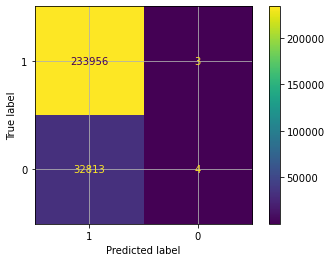

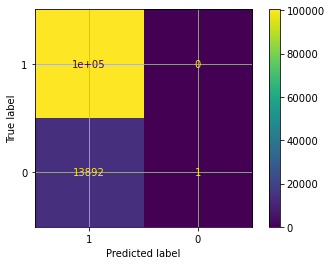

In [514]:
lr = LogisticRegression()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(lr, X_train, y_train, X_test )
df_model_test_train_acc1, df_model_performance1=print_classifier_scores(lr, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Logistic Regression')
df_model=df_model.append(df_model_performance1,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc1, ignore_index=True)

Train-Set Confusion Matrix:
 [[163621  70338]
 [  4411  28406]]
Recall Score    :  0.865587957461072
Precision Score :  0.28767317507899215
F1 Score        :  0.4318301016258618
Accuracy Score  :  0.7198061294869104
ROC AUC         :  0.8382896281580943
Predict Probability  : [[9.99997199e-01 2.80061665e-06]
 [9.99999885e-01 1.14839254e-07]
 [9.99999994e-01 6.42269297e-09]
 ...
 [1.00000000e+00 1.78253427e-11]
 [1.01875250e-02 9.89812475e-01]
 [3.83444711e-02 9.61655529e-01]]
Test-Set Confusion Matrix:
 [[70247 30193]
 [ 1965 11928]]
Recall Score    :  0.8585618656877564
Precision Score :  0.2831841599202298
F1 Score        :  0.4258935266183454
Accuracy Score  :  0.7187338738596906
ROC AUC         :  0.8353531734534894
Predict Probability  : [[9.89486525e-01 1.05134754e-02]
 [9.99999840e-01 1.60496701e-07]
 [2.43259191e-02 9.75674081e-01]
 ...
 [2.30650370e-02 9.76934963e-01]
 [6.28020987e-01 3.71979013e-01]
 [1.00000000e+00 1.45208423e-11]]


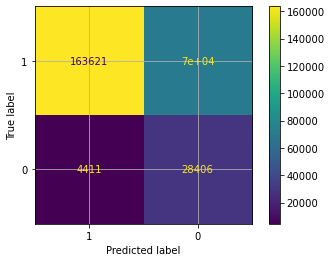

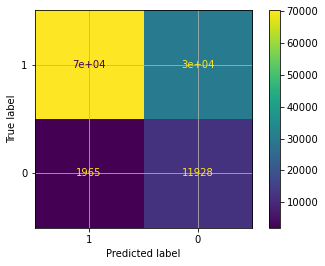

In [516]:
cb = CategoricalNB()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(cb, X_train, y_train, X_test )
df_model_test_train_acc2, df_model_performance2=print_classifier_scores(cb, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Naive Bayes CB')
df_model=df_model.append(df_model_performance2,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc2, ignore_index=True)

Train-Set Confusion Matrix:
 [[232219   1740]
 [ 28313   4504]]
Recall Score    :  0.1372459396044733
Precision Score :  0.7213324791800129
F1 Score        :  0.2306136555643737
Accuracy Score  :  0.8873474375506043
ROC AUC         :  0.8923379799341787
Predict Probability  : [[0.96180823 0.03819177]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.52340118 0.47659882]
 [0.76051741 0.23948259]]
Test-Set Confusion Matrix:
 [[98706  1734]
 [13005   888]]
Recall Score    :  0.06391708054415893
Precision Score :  0.33867276887871856
F1 Score        :  0.1075386012715713
Accuracy Score  :  0.8710870877174569
ROC AUC         :  0.8295775271308223
Predict Probability  : [[0.91060107 0.08939893]
 [1.         0.        ]
 [0.67513183 0.32486817]
 ...
 [0.66832771 0.33167229]
 [1.         0.        ]
 [1.         0.        ]]


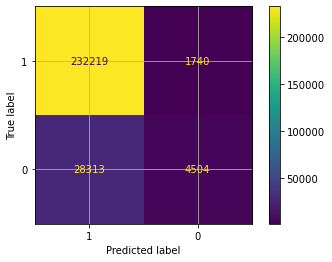

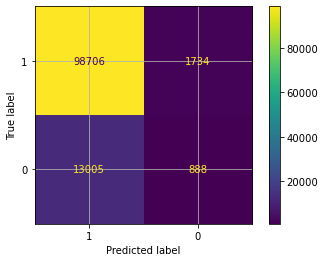

In [519]:
rf = RandomForestClassifier()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(rf, X_train, y_train, X_test )
df_model_test_train_acc3, df_model_performance3=print_classifier_scores(rf, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Random Forest')
df_model=df_model.append(df_model_performance3,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc3, ignore_index=True)

In [520]:
df_model

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score,ROC AUC
0,Logistic Regression,0.878495,0.000144,1.000000,0.000072,0.837371
1,Naive Bayes CB,0.718734,0.425894,0.283184,0.858562,0.835353
2,Random Forest,0.871087,0.107539,0.338673,0.063917,0.829578


Train-Set Confusion Matrix:
 [[232809   1150]
 [ 28902   3915]]
Recall Score    :  0.11929792485601974
Precision Score :  0.7729516288252715
F1 Score        :  0.20669447230874818
Accuracy Score  :  0.8873511860137344
ROC AUC         :  0.8936103152574857
Predict Probability  : [[0.96153846 0.03846154]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.52571429 0.47428571]
 [0.76744186 0.23255814]]
Test-Set Confusion Matrix:
 [[98825  1615]
 [13119   774]]
Recall Score    :  0.05571150939321961
Precision Score :  0.32398493093344494
F1 Score        :  0.09507431519469353
Accuracy Score  :  0.8711308196233808
ROC AUC         :  0.8068668165262507
Predict Probability  : [[0.91509434 0.08490566]
 [1.         0.        ]
 [0.67567568 0.32432432]
 ...
 [0.66787004 0.33212996]
 [1.         0.        ]
 [1.         0.        ]]


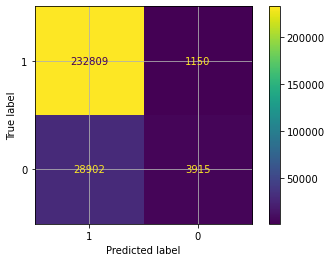

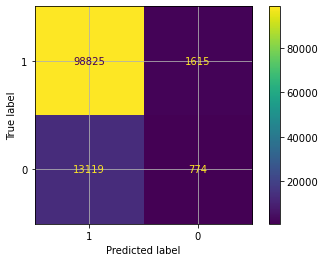

In [523]:
dt = DecisionTreeClassifier()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(dt, X_train, y_train, X_test )
df_model_test_train_acc4, df_model_performance4=print_classifier_scores(dt, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Decision Tree')
df_model=df_model.append(df_model_performance4,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc4, ignore_index=True)

In [525]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

Train-Set Confusion Matrix:
 [[233959      0]
 [ 32817      0]]
Recall Score    :  0.0
Precision Score :  0.0
F1 Score        :  0.0
Accuracy Score  :  0.8769866854589619
ROC AUC         :  0.849063985304812
Predict Probability  : [[0.52064428 0.47935572]
 [0.53496219 0.46503781]
 [0.53892098 0.46107902]
 ...
 [0.54008082 0.45991918]
 [0.50209449 0.49790551]
 [0.5037441  0.4962559 ]]
Test-Set Confusion Matrix:
 [[100440      0]
 [ 13893      0]]
Recall Score    :  0.0
Precision Score :  0.0
F1 Score        :  0.0
Accuracy Score  :  0.8784865261997848
ROC AUC         :  0.8464765286106136
Predict Probability  : [[0.50959602 0.49040398]
 [0.5334555  0.4665445 ]
 [0.5037441  0.4962559 ]
 ...
 [0.50396063 0.49603937]
 [0.51137142 0.48862858]
 [0.54082042 0.45917958]]


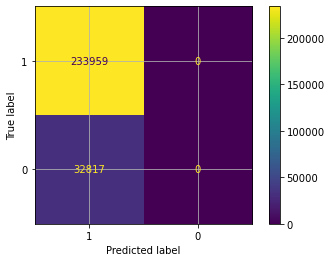

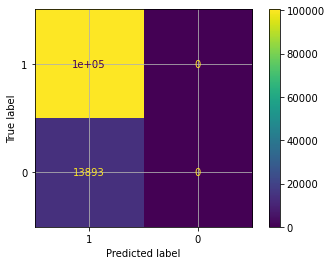

In [526]:
ab = AdaBoostClassifier()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(ab, X_train, y_train, X_test )
df_model_test_train_acc5, df_model_performance5=print_classifier_scores(ab, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'AdaBoost')
df_model=df_model.append(df_model_performance5,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc5, ignore_index=True)

In [527]:
df_model

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score,ROC AUC
0,Logistic Regression,0.878495,0.000144,1.000000,0.000072,0.837371
1,Naive Bayes CB,0.718734,0.425894,0.283184,0.858562,0.835353
2,Random Forest,0.871087,0.107539,0.338673,0.063917,0.829578
3,Decision Tree,0.871131,0.095074,0.323985,0.055712,0.806867
4,AdaBoost,0.878487,0.000000,0.000000,0.000000,0.846477


In [532]:
from catboost import CatBoostClassifier

Learning rate set to 0.111918
0:	learn: 0.5118750	total: 202ms	remaining: 3m 21s
1:	learn: 0.4323162	total: 236ms	remaining: 1m 57s
2:	learn: 0.3693511	total: 263ms	remaining: 1m 27s
3:	learn: 0.3340407	total: 281ms	remaining: 1m 9s
4:	learn: 0.3135111	total: 303ms	remaining: 1m
5:	learn: 0.3005541	total: 336ms	remaining: 55.6s
6:	learn: 0.2925056	total: 375ms	remaining: 53.2s
7:	learn: 0.2870720	total: 407ms	remaining: 50.5s
8:	learn: 0.2832172	total: 443ms	remaining: 48.7s
9:	learn: 0.2800561	total: 473ms	remaining: 46.9s
10:	learn: 0.2781353	total: 519ms	remaining: 46.6s
11:	learn: 0.2763273	total: 549ms	remaining: 45.2s
12:	learn: 0.2750771	total: 569ms	remaining: 43.2s
13:	learn: 0.2741643	total: 603ms	remaining: 42.5s
14:	learn: 0.2734638	total: 621ms	remaining: 40.8s
15:	learn: 0.2726525	total: 653ms	remaining: 40.2s
16:	learn: 0.2721228	total: 675ms	remaining: 39s
17:	learn: 0.2714037	total: 708ms	remaining: 38.6s
18:	learn: 0.2710254	total: 729ms	remaining: 37.7s
19:	learn: 0.

166:	learn: 0.2642706	total: 4.03s	remaining: 20.1s
167:	learn: 0.2642603	total: 4.05s	remaining: 20.1s
168:	learn: 0.2642358	total: 4.08s	remaining: 20s
169:	learn: 0.2642250	total: 4.1s	remaining: 20s
170:	learn: 0.2642006	total: 4.12s	remaining: 20s
171:	learn: 0.2641849	total: 4.14s	remaining: 19.9s
172:	learn: 0.2641729	total: 4.16s	remaining: 19.9s
173:	learn: 0.2641538	total: 4.19s	remaining: 19.9s
174:	learn: 0.2641363	total: 4.21s	remaining: 19.8s
175:	learn: 0.2641238	total: 4.23s	remaining: 19.8s
176:	learn: 0.2641114	total: 4.25s	remaining: 19.8s
177:	learn: 0.2640972	total: 4.28s	remaining: 19.8s
178:	learn: 0.2640819	total: 4.3s	remaining: 19.7s
179:	learn: 0.2640689	total: 4.32s	remaining: 19.7s
180:	learn: 0.2640556	total: 4.34s	remaining: 19.7s
181:	learn: 0.2640438	total: 4.37s	remaining: 19.6s
182:	learn: 0.2640349	total: 4.39s	remaining: 19.6s
183:	learn: 0.2640184	total: 4.42s	remaining: 19.6s
184:	learn: 0.2640031	total: 4.44s	remaining: 19.6s
185:	learn: 0.263989

328:	learn: 0.2623774	total: 7.65s	remaining: 15.6s
329:	learn: 0.2623695	total: 7.67s	remaining: 15.6s
330:	learn: 0.2623606	total: 7.69s	remaining: 15.5s
331:	learn: 0.2623496	total: 7.72s	remaining: 15.5s
332:	learn: 0.2623404	total: 7.74s	remaining: 15.5s
333:	learn: 0.2623333	total: 7.76s	remaining: 15.5s
334:	learn: 0.2623251	total: 7.78s	remaining: 15.4s
335:	learn: 0.2623159	total: 7.8s	remaining: 15.4s
336:	learn: 0.2623069	total: 7.83s	remaining: 15.4s
337:	learn: 0.2622983	total: 7.85s	remaining: 15.4s
338:	learn: 0.2622914	total: 7.87s	remaining: 15.4s
339:	learn: 0.2622746	total: 7.9s	remaining: 15.3s
340:	learn: 0.2622629	total: 7.92s	remaining: 15.3s
341:	learn: 0.2622529	total: 7.94s	remaining: 15.3s
342:	learn: 0.2622439	total: 7.97s	remaining: 15.3s
343:	learn: 0.2622332	total: 7.99s	remaining: 15.2s
344:	learn: 0.2622263	total: 8.01s	remaining: 15.2s
345:	learn: 0.2622169	total: 8.03s	remaining: 15.2s
346:	learn: 0.2622100	total: 8.06s	remaining: 15.2s
347:	learn: 0.

493:	learn: 0.2609865	total: 11.3s	remaining: 11.6s
494:	learn: 0.2609796	total: 11.4s	remaining: 11.6s
495:	learn: 0.2609761	total: 11.4s	remaining: 11.6s
496:	learn: 0.2609683	total: 11.4s	remaining: 11.6s
497:	learn: 0.2609578	total: 11.4s	remaining: 11.5s
498:	learn: 0.2609517	total: 11.5s	remaining: 11.5s
499:	learn: 0.2609431	total: 11.5s	remaining: 11.5s
500:	learn: 0.2609378	total: 11.5s	remaining: 11.5s
501:	learn: 0.2609279	total: 11.5s	remaining: 11.4s
502:	learn: 0.2609233	total: 11.5s	remaining: 11.4s
503:	learn: 0.2609159	total: 11.6s	remaining: 11.4s
504:	learn: 0.2609059	total: 11.6s	remaining: 11.4s
505:	learn: 0.2608895	total: 11.6s	remaining: 11.3s
506:	learn: 0.2608848	total: 11.6s	remaining: 11.3s
507:	learn: 0.2608763	total: 11.7s	remaining: 11.3s
508:	learn: 0.2608719	total: 11.7s	remaining: 11.3s
509:	learn: 0.2608638	total: 11.7s	remaining: 11.2s
510:	learn: 0.2608589	total: 11.7s	remaining: 11.2s
511:	learn: 0.2608544	total: 11.7s	remaining: 11.2s
512:	learn: 

660:	learn: 0.2599383	total: 15s	remaining: 7.68s
661:	learn: 0.2599314	total: 15s	remaining: 7.65s
662:	learn: 0.2599243	total: 15s	remaining: 7.63s
663:	learn: 0.2599157	total: 15s	remaining: 7.61s
664:	learn: 0.2599065	total: 15.1s	remaining: 7.58s
665:	learn: 0.2598997	total: 15.1s	remaining: 7.56s
666:	learn: 0.2598933	total: 15.1s	remaining: 7.54s
667:	learn: 0.2598859	total: 15.1s	remaining: 7.52s
668:	learn: 0.2598789	total: 15.1s	remaining: 7.5s
669:	learn: 0.2598685	total: 15.2s	remaining: 7.47s
670:	learn: 0.2598627	total: 15.2s	remaining: 7.45s
671:	learn: 0.2598587	total: 15.2s	remaining: 7.43s
672:	learn: 0.2598562	total: 15.2s	remaining: 7.4s
673:	learn: 0.2598507	total: 15.3s	remaining: 7.38s
674:	learn: 0.2598408	total: 15.3s	remaining: 7.36s
675:	learn: 0.2598373	total: 15.3s	remaining: 7.33s
676:	learn: 0.2598301	total: 15.3s	remaining: 7.31s
677:	learn: 0.2598214	total: 15.3s	remaining: 7.29s
678:	learn: 0.2598143	total: 15.4s	remaining: 7.26s
679:	learn: 0.2598094	

827:	learn: 0.2589982	total: 18.6s	remaining: 3.87s
828:	learn: 0.2589939	total: 18.6s	remaining: 3.85s
829:	learn: 0.2589880	total: 18.7s	remaining: 3.82s
830:	learn: 0.2589829	total: 18.7s	remaining: 3.8s
831:	learn: 0.2589781	total: 18.7s	remaining: 3.78s
832:	learn: 0.2589738	total: 18.7s	remaining: 3.75s
833:	learn: 0.2589677	total: 18.7s	remaining: 3.73s
834:	learn: 0.2589627	total: 18.8s	remaining: 3.71s
835:	learn: 0.2589553	total: 18.8s	remaining: 3.68s
836:	learn: 0.2589502	total: 18.8s	remaining: 3.66s
837:	learn: 0.2589436	total: 18.8s	remaining: 3.64s
838:	learn: 0.2589381	total: 18.8s	remaining: 3.62s
839:	learn: 0.2589359	total: 18.9s	remaining: 3.59s
840:	learn: 0.2589325	total: 18.9s	remaining: 3.57s
841:	learn: 0.2589264	total: 18.9s	remaining: 3.55s
842:	learn: 0.2589184	total: 18.9s	remaining: 3.52s
843:	learn: 0.2589136	total: 18.9s	remaining: 3.5s
844:	learn: 0.2589108	total: 19s	remaining: 3.48s
845:	learn: 0.2589058	total: 19s	remaining: 3.46s
846:	learn: 0.2589

986:	learn: 0.2581833	total: 22s	remaining: 290ms
987:	learn: 0.2581799	total: 22s	remaining: 268ms
988:	learn: 0.2581778	total: 22.1s	remaining: 245ms
989:	learn: 0.2581735	total: 22.1s	remaining: 223ms
990:	learn: 0.2581675	total: 22.1s	remaining: 201ms
991:	learn: 0.2581631	total: 22.1s	remaining: 178ms
992:	learn: 0.2581582	total: 22.1s	remaining: 156ms
993:	learn: 0.2581529	total: 22.2s	remaining: 134ms
994:	learn: 0.2581505	total: 22.2s	remaining: 111ms
995:	learn: 0.2581452	total: 22.2s	remaining: 89.1ms
996:	learn: 0.2581371	total: 22.2s	remaining: 66.9ms
997:	learn: 0.2581331	total: 22.2s	remaining: 44.6ms
998:	learn: 0.2581294	total: 22.3s	remaining: 22.3ms
999:	learn: 0.2581264	total: 22.3s	remaining: 0us
Train-Set Confusion Matrix:
 [[233195    764]
 [ 31465   1352]]
Recall Score    :  0.041198159490507966
Precision Score :  0.6389413988657845
F1 Score        :  0.07740531875304153
Accuracy Score  :  0.8791907817794704
ROC AUC         :  0.868051502998515
Predict Probabilit

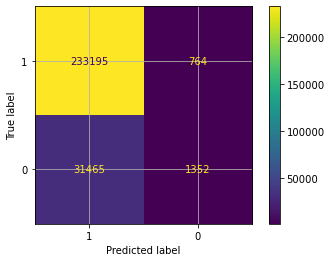

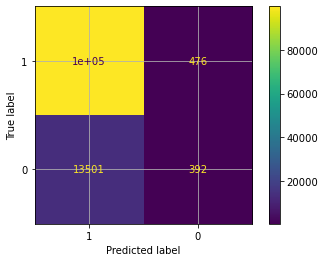

In [533]:
cat = CatBoostClassifier()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(cat, X_train, y_train, X_test )
df_model_test_train_acc6, df_model_performance6=print_classifier_scores(cat, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'CatBoost')
df_model=df_model.append(df_model_performance6,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc6, ignore_index=True)

In [534]:
df_model

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score,ROC AUC
0,Logistic Regression,0.878495,0.000144,1.000000,0.000072,0.837371
1,Naive Bayes CB,0.718734,0.425894,0.283184,0.858562,0.835353
2,Random Forest,0.871087,0.107539,0.338673,0.063917,0.829578
3,Decision Tree,0.871131,0.095074,0.323985,0.055712,0.806867
4,AdaBoost,0.878487,0.000000,0.000000,0.000000,0.846477
5,CatBoost,0.877752,0.053113,0.451613,0.028216,0.852118


In [343]:
def get_best_hyperparameters(model, params, cv_value , X_train, y_train ): 
    search = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=1,cv=cv_value) 
    search.fit(X_train, y_train)  
    print("Best Accuracy    :",  search.best_score_) 
    print("Best Parameters  : ", search.best_params_)
    print("Best Estimators : ",  search.best_estimator_)  
    best_grid = search.best_estimator_
    return best_grid

In [554]:
from sklearn.linear_model import LogisticRegression
logreg_params = {'penalty' : ['l2'], 
                 'C' : np.logspace(-1, 2, 100),
                 'solver' :['liblinear'],
                 'random_state' :[42,99]
                 }
lr_best_grid= get_best_hyperparameters(LogisticRegression(), logreg_params, 5, X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Accuracy    : 0.8769866854942006
Best Parameters  :  {'C': 0.1, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Estimators :  LogisticRegression(C=0.1, random_state=42, solver='liblinear')


Train-Set Confusion Matrix:
 [[233956      3]
 [ 32813      4]]
Recall Score    :  0.00012188804582990523
Precision Score :  0.5714285714285714
F1 Score        :  0.00024372410431391662
Accuracy Score  :  0.876990433922092
ROC AUC         :  0.8393775760908913
Predict Probability  : [[9.86583465e-01 1.34165355e-02]
 [9.98458815e-01 1.54118516e-03]
 [9.98686722e-01 1.31327791e-03]
 ...
 [9.99540509e-01 4.59491403e-04]
 [6.31173287e-01 3.68826713e-01]
 [6.66864885e-01 3.33135115e-01]]
Test-Set Confusion Matrix:
 [[100440      0]
 [ 13892      1]]
Recall Score    :  7.197869430648528e-05
Precision Score :  1.0
F1 Score        :  0.00014394702749388226
Accuracy Score  :  0.8784952725809696
ROC AUC         :  0.8373713255428363
Predict Probability  : [[8.81936503e-01 1.18063497e-01]
 [9.98197231e-01 1.80276938e-03]
 [6.73529396e-01 3.26470604e-01]
 ...
 [6.62950764e-01 3.37049236e-01]
 [8.18314672e-01 1.81685328e-01]
 [9.99553910e-01 4.46089981e-04]]


,Model,Accuracy Score,F1 Score,Precision Score,Recall Score,ROC AUC
0,Logistic Regression,0.878495,0.000144,1.000000,0.000072,0.837371
1,Naive Bayes CB,0.718734,0.425894,0.283184,0.858562,0.835353
2,Random Forest,0.871087,0.107539,0.338673,0.063917,0.829578
3,Decision Tree,0.871131,0.095074,0.323985,0.055712,0.806867
4,AdaBoost,0.878487,0.000000,0.000000,0.000000,0.846477
5,CatBoost,0.877752,0.053113,0.451613,0.028216,0.852118
6,Logistic Regression - Tuned,0.878495,0.000144,1.000000,0.000072,0.837371


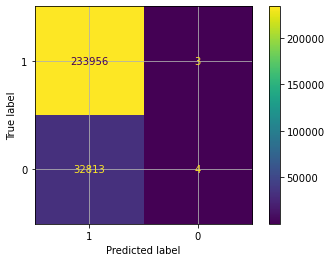

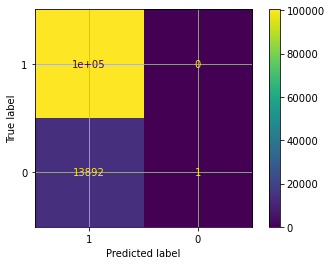

In [556]:
lr_grid = LogisticRegression()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(lr_grid, X_train, y_train, X_test )
df_model_test_train_acc7, df_model_performance7=print_classifier_scores(lr_grid, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Logistic Regression - Tuned')
df_model=df_model.append(df_model_performance7,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc7, ignore_index=True)
df_model

In [562]:
catboost_params = {'depth'         : [4,5,6,7],
                 'learning_rate' : [0.01,0.02],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
catboost_best_grid= get_best_hyperparameters(CatBoostClassifier(), catboost_params, 3, X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
0:	learn: 0.6734188	total: 16.4ms	remaining: 148ms
1:	learn: 0.6546647	total: 33.8ms	remaining: 135ms
2:	learn: 0.6367680	total: 51.9ms	remaining: 121ms
3:	learn: 0.6195901	total: 67.5ms	remaining: 101ms
4:	learn: 0.6033622	total: 84.3ms	remaining: 84.3ms
5:	learn: 0.5879301	total: 101ms	remaining: 67.5ms
6:	learn: 0.5731780	total: 118ms	remaining: 50.6ms
7:	learn: 0.5591459	total: 137ms	remaining: 34.3ms
8:	learn: 0.5458799	total: 155ms	remaining: 17.2ms
9:	learn: 0.5364521	total: 171ms	remaining: 0us
Best Accuracy    : 0.876986685455505
Best Parameters  :  {'depth': 4, 'iterations': 10, 'learning_rate': 0.01}
Best Estimators :  <catboost.core.CatBoostClassifier object at 0x000001B2A2A28190>


Learning rate set to 0.111918
0:	learn: 0.5118750	total: 26.5ms	remaining: 26.5s
1:	learn: 0.4323162	total: 66.9ms	remaining: 33.4s
2:	learn: 0.3693511	total: 86.5ms	remaining: 28.8s
3:	learn: 0.3340407	total: 122ms	remaining: 30.3s
4:	learn: 0.3135111	total: 142ms	remaining: 28.3s
5:	learn: 0.3005541	total: 171ms	remaining: 28.3s
6:	learn: 0.2925056	total: 203ms	remaining: 28.8s
7:	learn: 0.2870720	total: 230ms	remaining: 28.6s
8:	learn: 0.2832172	total: 264ms	remaining: 29s
9:	learn: 0.2800561	total: 302ms	remaining: 29.9s
10:	learn: 0.2781353	total: 339ms	remaining: 30.5s
11:	learn: 0.2763273	total: 370ms	remaining: 30.5s
12:	learn: 0.2750771	total: 389ms	remaining: 29.5s
13:	learn: 0.2741643	total: 409ms	remaining: 28.8s
14:	learn: 0.2734638	total: 428ms	remaining: 28.1s
15:	learn: 0.2726525	total: 450ms	remaining: 27.7s
16:	learn: 0.2721228	total: 471ms	remaining: 27.3s
17:	learn: 0.2714037	total: 495ms	remaining: 27s
18:	learn: 0.2710254	total: 517ms	remaining: 26.7s
19:	learn: 0

162:	learn: 0.2643263	total: 3.77s	remaining: 19.4s
163:	learn: 0.2643097	total: 3.79s	remaining: 19.3s
164:	learn: 0.2642977	total: 3.82s	remaining: 19.3s
165:	learn: 0.2642864	total: 3.84s	remaining: 19.3s
166:	learn: 0.2642706	total: 3.86s	remaining: 19.3s
167:	learn: 0.2642603	total: 3.88s	remaining: 19.2s
168:	learn: 0.2642358	total: 3.9s	remaining: 19.2s
169:	learn: 0.2642250	total: 3.93s	remaining: 19.2s
170:	learn: 0.2642006	total: 3.95s	remaining: 19.2s
171:	learn: 0.2641849	total: 3.97s	remaining: 19.1s
172:	learn: 0.2641729	total: 4s	remaining: 19.1s
173:	learn: 0.2641538	total: 4.02s	remaining: 19.1s
174:	learn: 0.2641363	total: 4.04s	remaining: 19s
175:	learn: 0.2641238	total: 4.06s	remaining: 19s
176:	learn: 0.2641114	total: 4.08s	remaining: 19s
177:	learn: 0.2640972	total: 4.11s	remaining: 19s
178:	learn: 0.2640819	total: 4.13s	remaining: 18.9s
179:	learn: 0.2640689	total: 4.15s	remaining: 18.9s
180:	learn: 0.2640556	total: 4.17s	remaining: 18.9s
181:	learn: 0.2640438	to

329:	learn: 0.2623695	total: 7.59s	remaining: 15.4s
330:	learn: 0.2623606	total: 7.61s	remaining: 15.4s
331:	learn: 0.2623496	total: 7.63s	remaining: 15.4s
332:	learn: 0.2623404	total: 7.65s	remaining: 15.3s
333:	learn: 0.2623333	total: 7.67s	remaining: 15.3s
334:	learn: 0.2623251	total: 7.7s	remaining: 15.3s
335:	learn: 0.2623159	total: 7.72s	remaining: 15.3s
336:	learn: 0.2623069	total: 7.74s	remaining: 15.2s
337:	learn: 0.2622983	total: 7.76s	remaining: 15.2s
338:	learn: 0.2622914	total: 7.79s	remaining: 15.2s
339:	learn: 0.2622746	total: 7.81s	remaining: 15.2s
340:	learn: 0.2622629	total: 7.83s	remaining: 15.1s
341:	learn: 0.2622529	total: 7.86s	remaining: 15.1s
342:	learn: 0.2622439	total: 7.88s	remaining: 15.1s
343:	learn: 0.2622332	total: 7.9s	remaining: 15.1s
344:	learn: 0.2622263	total: 7.92s	remaining: 15s
345:	learn: 0.2622169	total: 7.95s	remaining: 15s
346:	learn: 0.2622100	total: 7.97s	remaining: 15s
347:	learn: 0.2622023	total: 7.99s	remaining: 15s
348:	learn: 0.2621924	

496:	learn: 0.2609683	total: 11.3s	remaining: 11.5s
497:	learn: 0.2609578	total: 11.4s	remaining: 11.5s
498:	learn: 0.2609517	total: 11.4s	remaining: 11.4s
499:	learn: 0.2609431	total: 11.4s	remaining: 11.4s
500:	learn: 0.2609378	total: 11.4s	remaining: 11.4s
501:	learn: 0.2609279	total: 11.5s	remaining: 11.4s
502:	learn: 0.2609233	total: 11.5s	remaining: 11.3s
503:	learn: 0.2609159	total: 11.5s	remaining: 11.3s
504:	learn: 0.2609059	total: 11.5s	remaining: 11.3s
505:	learn: 0.2608895	total: 11.5s	remaining: 11.3s
506:	learn: 0.2608848	total: 11.6s	remaining: 11.2s
507:	learn: 0.2608763	total: 11.6s	remaining: 11.2s
508:	learn: 0.2608719	total: 11.6s	remaining: 11.2s
509:	learn: 0.2608638	total: 11.6s	remaining: 11.2s
510:	learn: 0.2608589	total: 11.7s	remaining: 11.2s
511:	learn: 0.2608544	total: 11.7s	remaining: 11.1s
512:	learn: 0.2608486	total: 11.7s	remaining: 11.1s
513:	learn: 0.2608433	total: 11.7s	remaining: 11.1s
514:	learn: 0.2608377	total: 11.7s	remaining: 11.1s
515:	learn: 

660:	learn: 0.2599383	total: 15s	remaining: 7.67s
661:	learn: 0.2599314	total: 15s	remaining: 7.65s
662:	learn: 0.2599243	total: 15s	remaining: 7.62s
663:	learn: 0.2599157	total: 15s	remaining: 7.61s
664:	learn: 0.2599065	total: 15.1s	remaining: 7.58s
665:	learn: 0.2598997	total: 15.1s	remaining: 7.56s
666:	learn: 0.2598933	total: 15.1s	remaining: 7.54s
667:	learn: 0.2598859	total: 15.1s	remaining: 7.52s
668:	learn: 0.2598789	total: 15.1s	remaining: 7.5s
669:	learn: 0.2598685	total: 15.2s	remaining: 7.47s
670:	learn: 0.2598627	total: 15.2s	remaining: 7.45s
671:	learn: 0.2598587	total: 15.2s	remaining: 7.43s
672:	learn: 0.2598562	total: 15.2s	remaining: 7.41s
673:	learn: 0.2598507	total: 15.3s	remaining: 7.38s
674:	learn: 0.2598408	total: 15.3s	remaining: 7.36s
675:	learn: 0.2598373	total: 15.3s	remaining: 7.34s
676:	learn: 0.2598301	total: 15.3s	remaining: 7.31s
677:	learn: 0.2598214	total: 15.4s	remaining: 7.29s
678:	learn: 0.2598143	total: 15.4s	remaining: 7.27s
679:	learn: 0.2598094

819:	learn: 0.2590411	total: 18.6s	remaining: 4.08s
820:	learn: 0.2590371	total: 18.6s	remaining: 4.05s
821:	learn: 0.2590328	total: 18.6s	remaining: 4.03s
822:	learn: 0.2590288	total: 18.6s	remaining: 4.01s
823:	learn: 0.2590219	total: 18.7s	remaining: 3.99s
824:	learn: 0.2590170	total: 18.7s	remaining: 3.96s
825:	learn: 0.2590095	total: 18.7s	remaining: 3.94s
826:	learn: 0.2590057	total: 18.7s	remaining: 3.92s
827:	learn: 0.2589982	total: 18.8s	remaining: 3.9s
828:	learn: 0.2589939	total: 18.8s	remaining: 3.87s
829:	learn: 0.2589880	total: 18.8s	remaining: 3.85s
830:	learn: 0.2589829	total: 18.8s	remaining: 3.83s
831:	learn: 0.2589781	total: 18.8s	remaining: 3.8s
832:	learn: 0.2589738	total: 18.9s	remaining: 3.78s
833:	learn: 0.2589677	total: 18.9s	remaining: 3.76s
834:	learn: 0.2589627	total: 18.9s	remaining: 3.73s
835:	learn: 0.2589553	total: 18.9s	remaining: 3.71s
836:	learn: 0.2589502	total: 18.9s	remaining: 3.69s
837:	learn: 0.2589436	total: 19s	remaining: 3.67s
838:	learn: 0.25

984:	learn: 0.2581949	total: 22.2s	remaining: 339ms
985:	learn: 0.2581890	total: 22.3s	remaining: 316ms
986:	learn: 0.2581833	total: 22.3s	remaining: 294ms
987:	learn: 0.2581799	total: 22.3s	remaining: 271ms
988:	learn: 0.2581778	total: 22.3s	remaining: 248ms
989:	learn: 0.2581735	total: 22.4s	remaining: 226ms
990:	learn: 0.2581675	total: 22.4s	remaining: 203ms
991:	learn: 0.2581631	total: 22.4s	remaining: 181ms
992:	learn: 0.2581582	total: 22.4s	remaining: 158ms
993:	learn: 0.2581529	total: 22.4s	remaining: 135ms
994:	learn: 0.2581505	total: 22.5s	remaining: 113ms
995:	learn: 0.2581452	total: 22.5s	remaining: 90.3ms
996:	learn: 0.2581371	total: 22.5s	remaining: 67.7ms
997:	learn: 0.2581331	total: 22.5s	remaining: 45.1ms
998:	learn: 0.2581294	total: 22.5s	remaining: 22.6ms
999:	learn: 0.2581264	total: 22.6s	remaining: 0us
Train-Set Confusion Matrix:
 [[233195    764]
 [ 31465   1352]]
Recall Score    :  0.041198159490507966
Precision Score :  0.6389413988657845
F1 Score        :  0.077

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score,ROC AUC
0,Logistic Regression,0.878495,0.000144,1.000000,0.000072,0.837371
1,Naive Bayes CB,0.718734,0.425894,0.283184,0.858562,0.835353
2,Random Forest,0.871087,0.107539,0.338673,0.063917,0.829578
3,Decision Tree,0.871131,0.095074,0.323985,0.055712,0.806867
4,AdaBoost,0.878487,0.000000,0.000000,0.000000,0.846477
5,CatBoost,0.877752,0.053113,0.451613,0.028216,0.852118
6,Logistic Regression - Tuned,0.878495,0.000144,1.000000,0.000072,0.837371
7,Cat Boost - Tuned,0.877752,0.053113,0.451613,0.028216,0.852118


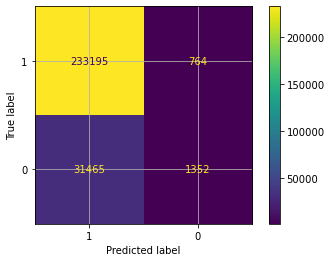

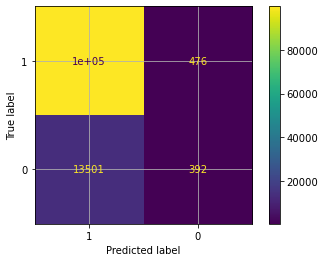

In [563]:
cat_grid = CatBoostClassifier()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(cat_grid, X_train, y_train, X_test )
df_model_test_train_acc8, df_model_performance8=print_classifier_scores(cat_grid, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Cat Boost - Tuned')
df_model=df_model.append(df_model_performance8,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc8, ignore_index=True)
df_model